In [342]:
# CH3 Classification

# Imports

# Sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Data
import pandas as pd
import numpy as np
import sympy as sp

# Visualization
import matplotlib.pyplot as plt
from IPython.display import display, Math
import seaborn as sns

In [58]:
# MNIST data
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [59]:
# Keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [71]:
# Load features and targets
X, y = mnist["data"], mnist["target"]
print(f"Container type: {type(X)} | Element type: {X.dtype}")
print(f"Container type: {type(y)} | Element type: {y.dtype}")

Container type: <class 'numpy.ndarray'> | Element type: float64
Container type: <class 'numpy.ndarray'> | Element type: object


X type: <class 'numpy.ndarray'> | y type: <class 'numpy.ndarray'>


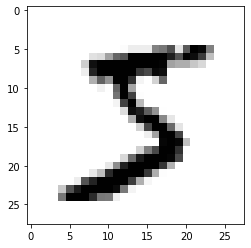

In [173]:
# Inspect
print(f"X type: {type(X)} | y type: {type(y)}")
first_record = X[0]  # Image
some_digit_image = first_record.reshape(28, 28)  # pixel dims
plt.imshow(some_digit_image, cmap='binary')

In [66]:
# Label for above image
print(f"The label for row 1 is the number: {y[0]} of {type(y[0])}")

The label for row 1 is the number: 5 of <class 'str'>


In [67]:
# Divide testing and training 
y = y.astype(np.uint8)  # Convert to byte length unsigned int
bound = 60000
X_train, X_test, y_train, y_test = X[ : bound], X[bound : ], y[ : bound], y[bound : ]

In [217]:
# BINARY CLASSIFIER FOR num 5
y_train_5 = (y_train == 5)  # Creates boolean array
print(type(y_train_5))
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

<class 'numpy.ndarray'>


SGDClassifier(random_state=42)

In [75]:
# Get list of accuracies using k folds and SGD Classifier
# scoring="accuracy" requires exact match of predicted label and actual label
# cv tells how many experiments to conduct and (?) also divides the total amount of records
# into total/k folds
score = cross_val_score(sgd_clf, X_train, y_train_5, scoring="accuracy", cv=3)
print(score)

[0.95035 0.96035 0.9604 ]


In [78]:
# CONFUSION MATRIX
# Use cross_val_predict to get set of predictions made on each test fold
# created in the kth cross val experiment

# Predictions for whether a number is 5 (true) or not (false)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [88]:
# The confusion matrix itself
#        _   ?non5  ?5     _
#  non5 |      a    b       |
#  5    |_     c    d      _|
# Each row is a actual class
# Each column is the predicted class
cm = confusion_matrix(y_train_5, y_train_pred)
print(type(cm))
cm_mat = sp.Matrix(cm)
display(cm_mat)
display(cm)

# Summarize
print(f"{cm[0,0]} Correct non5\n{cm[0,1]} False Positives\n{cm[1,0]} False Negatives\n{cm[1,1]} Correct 5")

<class 'numpy.ndarray'>


Matrix([
[53892,  687],
[ 1891, 3530]])

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

53892 Correct non5
687 False Positives
1891 False Negatives
3530 Correct 5


$\text{precision}=\frac{\text{True Positives}}{\text{True Positives}\ +\ False\ Positives}$
$\\ $
$\\ $  
$\\ \text{recall}=\frac{\text{True Positives}}{\text{True Positives}\ +\ False\ Negatives}$

In [93]:
# PRECISION AND RECALL
confusion_matrix_precision = precision_score(y_train_5, y_train_pred)
confusion_matrix_recall = recall_score(y_train_5, y_train_pred)
print(f"How often classifier is correct when claiming image is a 5? {confusion_matrix_precision * 100}\n\
How many 5s are actually detected by the classifier? {confusion_matrix_recall * 100}")

How often classifier is correct when claiming image is a 5? 83.70879772350011
How many 5s are actually detected by the classifier? 65.11713705958311


$F_1=\frac{\text{True Positives}}{\text{True Positives}\ +\ \frac{False\ Negatives\ +\ False\ Positives}{2}}$

In [95]:
# Harmonic mean -- high only if precision and recall are good
confusion_matrix_f1_score = f1_score(y_train_5, y_train_pred)
print(f"F1 score: {confusion_matrix_f1_score}")

F1 score: 0.7325171197343846


In [97]:
# PRECISION RECALL TRADE OFF AND CHOOSING THRESHOLDS FOR DECISION FXNS
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [196]:
# Inspect scores
y_scores.shape
y_scores[0]
y_scores[1]

-26883.792024244427

In [98]:
# Precision recall curve variables
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [103]:
# Types
test_arr = np.array([1,2,3,4,5])
print(test_arr[:-1])
print(f"Precisions type: {type(precisions)}")
print(f"Recalls type: {type(recalls)}")
print(f"Thresholds type: {type(thresholds)}")

[1 2 3 4]
Precisions type: <class 'numpy.ndarray'>
Recalls type: <class 'numpy.ndarray'>
Thresholds type: <class 'numpy.ndarray'>


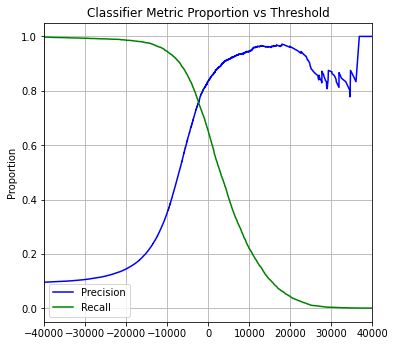

In [142]:
# Plot it
generic_x = np.arange(0., 5., 0.2)

# Always a <class 'Figure'> obj first
fig = plt.figure()

# Size
fig.set_size_inches(20, 5.5)

# # Subplot 1
# ax1 = fig.add_subplot(131)
# ax1.plot(thresholds, precisions[:-1], "b")

# # Subplot 2
# ax2 = fig.add_subplot(132)
# ax2.plot(thresholds, recalls[:-1], "g")

# Subplot 3
ax3 = fig.add_subplot(133)
ax3.plot(thresholds, precisions[:-1], "b-", label="Precision")
ax3.plot(thresholds, recalls[:-1], "g-", label="Recall")
ax3.legend(loc="lower left")
ax3.set_xlim([-40000, 40000])
ax3.set_title("Classifier Metric Proportion vs Threshold")
ax3.set_ylabel("Proportion")
ax3.grid()

# Save it
fig.savefig("./figures/precision_recall_curve.jpg", bbox_inches="tight")

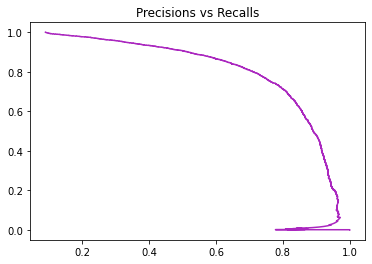

In [150]:
# Another way to visualize the tradeoff
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(precisions, recalls, color="#aa27bf")
ax1.set_title("Precisions vs Recalls")
fig2.savefig("./figures/pred_v_recalls.jpg")

In [153]:
# ROC CURVE -- Receiver Operating Characteristic
# Understand cross_val_predict
# false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [187]:
# inspect results of roc_curve() function
print("FPR: ", str(type(fpr)), str(fpr.shape))
print("TPR ", str(type(tpr)), str(tpr.shape))
print("Thresholds: ", str(type(thresholds)), str(thresholds.shape))
print(type(plt.figure()))

FPR:  <class 'numpy.ndarray'> (3908,)
TPR  <class 'numpy.ndarray'> (3908,)
Thresholds:  <class 'numpy.ndarray'> (3908,)
<class 'matplotlib.figure.Figure'>


<Figure size 432x288 with 0 Axes>

In [210]:
def roc_plot(false_positive_rate, true_positive_rate, clf_name="Selected Classifier", y_train=None, y_scores=None):
    """Helper function for plotting Receiver Operating Characteristics Curve.
    :param false_positive_rate: <class 'np.ndarray'> FPR after given threshold i.
    :param true_positive_rate: <class 'np.ndarray'> TPR after given threshold i.
    :param clf_name: <class 'str'> Name of classifier used.
    :param y_train: <class 'np.ndarray'> The labels for the data set.
    :param y_scores: <class 'np.ndarray'> The preds of y from k-fold cross.
    :return: <class 'matplotlib.figure.Figure'> With corresponding ROC plot.
    """
    # Figure
    fig = plt.figure()

    # Subplot
    ax = fig.add_subplot(111)

    # Plots
    ax.plot(false_positive_rate, true_positive_rate, linewidth=2, label=f"ROC for {clf_name}")
    ax.plot([0,1], [0,1], "k--", label="ROC for Random Classifier")

    # Area under the curve (AUC)
    try:
        print("in here")
        # Check valid
        train_shape = y_train.shape
        score_shape = y_scores.shape

        # AUC stuf
        auc = roc_auc_score(y_train, y_scores)
        ax.plot([], [], " ", label=f"AUC: {np.round(auc, 2)}")

    except:
        pass

    finally:
        # Styling
        ax.legend(loc="lower right")
        ax.grid()
        ax.set_title("Receiver Operating Characteristic (ROC) Curve")
        ax.set_xlabel("False Positives")
        ax.set_ylabel("True Positives")

        # Return figure obj
        return fig

in here


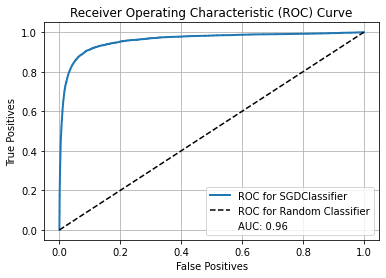

In [211]:
sgd_roc_fig = roc_plot(fpr, tpr, "SGDClassifier", y_train_5, y_scores)

In [193]:
# Another way to measure classifiers Area Under Curve (AUC)
# Deceptive in this case because too few positives (5s)
print(type(y_train_5))
print(type(y_scores))
roc_auc_score(y_train_5, y_scores)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


0.9604938554008616

In [164]:
# RANDOM FOREST CLASSIFIER
rf_clf = RandomForestClassifier(random_state=42)

In [165]:
# Probability prediction from RF
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [177]:
# Inspect results
rf_probabilities_matrix = sp.Matrix(y_probas_forest)
print(f"The probability that the first instance is a 5 is {np.round(np.float(rf_probabilities_matrix[0, 1]), 2)}")
display(rf_probabilities_matrix[0:5, :])

The probability that the first instance is a 5 is 0.89


Matrix([
[0.11, 0.89],
[0.99, 0.01],
[0.96, 0.04],
[ 1.0,  0.0],
[0.99, 0.01]])

In [178]:
# Info to plot RF ROC (Receiver Operating Characteristic)
y_scores_forest = y_probas_forest[ :, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_forest)

in here


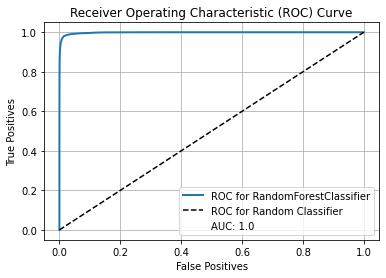

In [212]:
# Plot the curve
rf_roc_fig = roc_plot(fpr_rf, tpr_rf, "RandomForestClassifier", y_train_5, y_scores_forest)

In [221]:
# Scale data
print(type(X_train), X_train.dtype)
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

<class 'numpy.ndarray'> float64


In [222]:
# See how scaling changed results
# All accuracies across folds
scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [224]:
# Print scores for above cell
print(scores)

[0.8983 0.891  0.9018]


In [226]:
# y_train info
print(y_train)
print(X_train_scaled)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [223]:
# ERROR ANALYSIS

# Make predictions on y_train using y_pred
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [227]:
# Confusion matrix -- y_train and y_preds
# Remember how each row -- corresponds to the class
# Each column corresponds to the predicted class
new_cm = confusion_matrix(y_train, y_train_pred)
display(sp.Matrix(new_cm))

Matrix([
[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
[   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
[  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
[  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
[  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
[  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
[  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
[  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
[  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
[  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [293]:
def plot_hmap(matrix, cmap="jet", annot=False, fmt="d"):
    """Helper function to plot heat map.
    :param matrix: <class 'numpy.ndarray'> Data for heatmap.
    :param cmap: <class 'str'> Color of color map.
    :param annot: <class 'bool'> Annotate heatmap.
    :param fmt: <class 'str'> Format of data displayed on heatmap.
    :return: <class 'matplotlib.figure.Figure'> containing single
        subplot in which there is a single 
        <class 'matplotlib.axes._subplots.AxesSubplot'> of a heatmap.
    """
    # Figure obj
    hmap_fig = plt.figure()

    # Ax obj
    hmap_ax = hmap_fig.add_subplot(111)

    # The heatmap
    sns.heatmap(matrix, cmap=cmap, annot=annot, ax=hmap_ax, fmt=fmt)

    # Return the figure
    return hmap_fig

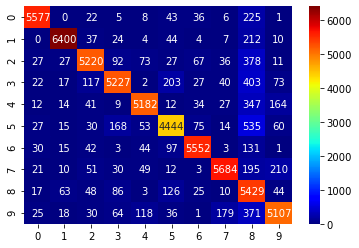

In [288]:
# Heatmap for plot
new_cm_hmap = plot_hmap(new_cm, annot=True)
new_cm_hmap.savefig("./figures/sgd_mnist_hmap.jpg", bbox_inches="tight")

In [294]:
def normalize_confusion_matrix(conf_mx):
    """Helper function for normalization of confusion matrix.
    :param conf_mx: <class 'numpy.ndarray'> Confusion matrix
        to be normalized.
    :return: <class 'numpy.ndarray'> Normalized confusion matrix.
    """
    # Sum across a row (creates a column vector) and then divide 
    # each element in a conf_mx by that sum            
    return conf_mx / conf_mx.sum(axis=1, keepdims=True)

In [295]:
# Normalized confusion matrix
normalized_new_cm = normalize_confusion_matrix(new_cm)

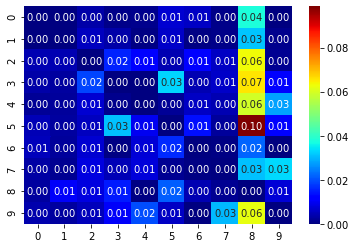

In [300]:
# Plot normalized confusion matrix with errors showing only
np.fill_diagonal(normalized_new_cm, 0)
normalized_new_cm_hmap = plot_hmap(normalized_new_cm, annot=True, fmt=".2f")

In [315]:
# Mechancis for np.c_ for multilabel classification
arr1 = np.array(
    [
        [1,2,3,4,5],
        [6,7,8,9,10]
    ]
)
arr2 = np.array(
    [
        [11,12,13,14,15],
        [16,17,18,19,20]
    ]
)
display(Math(r"\text{First Matrix:}"))
display(sp.Matrix(arr1))
display(Math(r"\text{Second Matrix:}"))
display(sp.Matrix(arr2))
display(Math(r"\text{Stacked Matrix after np.c_:}"))
display(sp.Matrix(np.c_[arr1, arr2]))

<IPython.core.display.Math object>

Matrix([
[1, 2, 3, 4,  5],
[6, 7, 8, 9, 10]])

<IPython.core.display.Math object>

Matrix([
[11, 12, 13, 14, 15],
[16, 17, 18, 19, 20]])

<IPython.core.display.Math object>

Matrix([
[1, 2, 3, 4,  5, 11, 12, 13, 14, 15],
[6, 7, 8, 9, 10, 16, 17, 18, 19, 20]])

In [352]:
# MULTILABEL CLASSIFICATION
y_train_large = (y_train >= 7)  # Boolean array of classes >= 7 ... so 7, 8, 9
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
display(Math(r"\text{y>=7   y odd}"))
y_multilabel_mx_sample = sp.Matrix(y_multilabel)[0:5, : ]
display(y_multilabel_mx_sample)

<IPython.core.display.Math object>

Matrix([
[False,  True],
[False, False],
[False, False],
[False,  True],
[ True,  True]])

In [328]:
# K nearest neighbors
knn_clf = KNeighborsClassifier()

In [329]:
# Fit knn
knn_model = knn_clf.fit(X_train, y_multilabel)

In [338]:
# Memory
print(f"knn_clf is knn_model: {knn_model is knn_clf}")
print(f"knn_clf == knn_model: {knn_model == knn_clf}")
print("\nSince these two are the same, I could pass in just knn_clf to\n\
any sklearn functions requiring fitted estimator... however, for\n\
clarity, using knn_model seems to be a better choice.\n\
Oddly, RANDOM FOREST classifier has no .fit() step before CV.\n\
I believe a fit step is always necessary, though. Verify this!!")

knn_clf is knn_model: True
knn_clf == knn_model: True

Since these two are the same, I could pass in just knn_clf to
any sklearn functions requiring fitted estimator... however, for
clarity, using knn_model seems to be a better choice.
Oddly, RANDOM FOREST classifier has no .fit() step before CV.
I believe a fit step is always necessary, though. Verify this!!


In [344]:
# Predictions
knn_model_y_preds = cross_val_predict(knn_model, X_train, y_multilabel, cv=3)

In [347]:
# Accuracy score with predictions
knn_accuracy = accuracy_score(y_multilabel, knn_model_y_preds)

Accuracy of Subsets: 0.9746166666666667


In [349]:
# F1 Score
knn_f1_score = f1_score(y_multilabel, knn_model_y_preds, average="macro")

In [351]:
# Print init metrics
print(f"Accuracy of Subsets: {knn_accuracy}")
print(f"F1 Score: {knn_f1_score}")

Accuracy of Subsets: 0.9746166666666667
F1 Score: 0.976410265560605


In [357]:
# Compare preds mx with labels mx
knn_model_y_preds_mx_sample = sp.Matrix(knn_model_y_preds)[0:5, :]
display(Math(r"\text{y>=7   y odd}"))
display(Math(r"\text{Labeled}"))
display(y_multilabel_mx_sample)
display(Math(r"\text{Predicted}"))
display(knn_model_y_preds_mx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Matrix([
[False,  True],
[False, False],
[False, False],
[False,  True],
[ True,  True]])

<IPython.core.display.Math object>

Matrix([
[False,  True],
[False, False],
[False, False],
[False,  True],
[ True,  True]])

In [361]:
# Precision and recall scores
knn_precision = precision_score(y_multilabel, knn_model_y_preds, average="macro")
knn_recall = recall_score(y_multilabel, knn_model_y_preds, average="macro")

In [362]:
# Display precision and recall scores
print(f"@ Current Threshold: Precision = {knn_precision} & Recall = {knn_recall}")

@ Current Threshold: Precision = 0.9744001577165913 & Recall = 0.9785042366458462


In [363]:
# Probability prediction with knn
knn_model_y_probas = cross_val_predict(knn_model, X_train, y_multilabel, cv=3, method='predict_proba')

In [365]:
# PC Curve
# fpr, tpr, thresholds = precision_recall_curve(y_multilabel, knn_model_y_probas)